# Question: 

You belong to the data team at a local research hospital. You&#39;ve been tasked with
developing a means to help doctors diagnose breast cancer. You&#39;ve been given data
about biopsied breast cells; where it is benign (not harmful) or malignant (cancerous).
1. What features of a cell are the largest drivers of malignancy?
2. How would a physician use your product?
3. There is a non-zero cost in time and money to collect each feature about a given cell. How would you go about determining the most cost-efficient method of detecting malignancy?

# Import all libraries and dependencies

In [180]:
## Question: You've been given data about biopsied breast cells; where it is benign (not harmful) or malignant (cancerous).


#import all required libraries

import os
import pandas as pd
import numpy as np


#visulization libraries
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib

import datetime

#data preprocessing

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm
from scipy import stats
from scipy.stats import skew 
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
#from mlinsights.mlmodel import QuantileLinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.ensemble import RandomForestClassifier
#import xgboost
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor
# from sklearn.model_selection import KFold, cross_val_score

# Read Data:

The data has 15855 observations along with 11 features including the patient ID.

In [102]:
#read data

# Input Dataset for the Model

def ReadFromCSV(FilePath, sckipLines = 0, sep = ','):  

    #Read and clean the csv file in FilePath ignoring the first sckipLines lines.

    #(omits non-ascii characters from columns' name)

    xa = pd.read_csv(FilePath, header=sckipLines, sep = sep, low_memory=False, index_col=0)

    return xa

In [113]:
df=ReadFromCSV('/Users/mojganmazouchi/Desktop/BreastCancer_dc/Copy of breast-cancer-wisconsin.txt') 
print(df.shape)  #(15,855, 12)

#df=df.drop(['Index'],axis=1)
df.head()


(15855, 11)


,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,,
0,1241035,7,8,3,7,4,5,7,8,2,4
1,1107684,6,10,5,5,4,10,6,10,1,4
2,691628,8,6,4,10,10,1,3,5,1,4
3,1226612,7,5,6,3,3,8,7,4,1,4
4,1142706,5,10,10,10,6,10,6,5,2,4


# Exploratory Data Analysis-- EDA

# Data exploration (Response)

Here I assumed the classes imported as 40 is 4 in another scale and 20 was suppose to be 2 so I converted them to 4 & 2 and I converted them to 4 and 2. I also removed any unrelated response values like "No idea", '#' or "?" from Class variable.
After removing the out of range Class values, the observations reduce to 15804.


In [128]:
df1=df.copy()
print(df['Class'].describe())  #7 unique & top: 4 

df1.Class.replace(['40', '20'], ['4', '2'], inplace=True)
print ('Class Distribution and Values:',df1['Class'].value_counts().to_dict()) ## Data is Imbalance!!! 4 has 15164 observations and class 2 has 456 observations

## I converted #, 'No idea', ? all to a category of Not available==0
df1.Class.replace(['#', 'No idea','?'], ['0', '0','0'], inplace=True)
df1= df1[(df1["Class"] != '0')]
print ('Class Distribution and Values:', df1['Class'].value_counts().to_dict()) ## Data is Imbalance!!! 4 has 15164 observations and class 2 has 456 observations

df1['Class'].dtype
df1.shape


count     15827
unique        7
top           4
freq      15164
Name: Class, dtype: object
Class Distribution and Values: {'4': 15315, '2': 461, '?': 23, 'No idea': 17, '#': 11}
Class Distribution and Values: {'4': 15315, '2': 461}


(15804, 11)

# Remove Duplicated Rows

After removing duplicated observation shrinked from 15,804 to unique 723 observations.

In [112]:
df1.groupby(df1.columns.tolist(),as_index=False).size() # check for duplicated rows & see how many records we have for each observations

print ('df1 with duplicates:', df1.shape) #(15804, 11)
df2=df1.drop_duplicates() 
print ('df1 without duplicates:', df2.shape)#(723, 11)

df1 with duplicates: (15804, 11)
df1 without duplicates: (723, 11)


# Handling Missing Values

There are only 13 missing values that are missed from most of the columns. The percentage of missing values are only 0.018 which means less than 5% of the data is missing values so we can safely remove those. So the resulted observations shrinked to 710

In [138]:
total =df2.isnull().sum().sort_values(ascending=False) # 13 missing values in all variables except the Clump Thickness
percent = (df2.isnull().sum()/df2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print (missing_data.head(10))

#dealing with missing data by dropping cols with more than 25% missing values

#df2_nomiss= df2.drop((missing_data[missing_data['Percent'] > 0]).index,1) 
df2_nomiss=df2.dropna()
print (df2_nomiss.shape) #
df2_nomiss['Class']=df2_nomiss['Class'].astype(int)
print ('Class Distribution and Values:', df5['Class'].value_counts().to_dict()) 

                             Total  Percent
Class                            0      0.0
Mitoses                          0      0.0
Normal Nucleoli                  0      0.0
Bland Chromatin                  0      0.0
Bare Nuclei                      0      0.0
Single Epithelial Cell Size      0      0.0
Marginal Adhesion                0      0.0
Uniformity of Cell Shape         0      0.0
Uniformity of Cell Size          0      0.0
Clump Thickness                  0      0.0
(710, 11)
Class Distribution and Values: {2: 456, 4: 254}


# Data exploration (Features)

For Bare Nuclei variable when '?' defined new category of zero.
But for all other repeated 'No idea', '?', '#' I removed them from the dataset. Remove ID as it does not provide any further information with the current data unless we access to other dataset like demographic locations/ time of each test, etc. for each patient.

In [136]:
df3=df2_nomiss.copy()

df3 = df3[(df3["Uniformity of Cell Size"] != "No idea") & (df3["Uniformity of Cell Size"] != "#")& (df3["Uniformity of Cell Size"] != "?")]
df3['Bare Nuclei']=df3['Bare Nuclei'].replace('?', 0)

#df4= df4[df4.applymap(np.isreal).all(1)]
# df4.applymap(lambda x: isinstance(x, (int, float)))

df3 = df3.drop('ID', 1)

df3=df3.apply(pd.to_numeric)
df3.head(50)
df3.shape #(710, 11)
df3= df3.applymap(lambda x: x/10 if x > 10 else x)
print (df3.head(50))

       Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
Index                                                                       
0                  7.0                      8.0                       3.0   
1                  6.0                     10.0                       5.0   
2                  8.0                      6.0                       4.0   
3                  7.0                      5.0                       6.0   
4                  5.0                     10.0                      10.0   
5                 10.0                      4.0                       4.0   
6                 10.0                      9.0                       7.0   
10                 7.0                      3.0                       4.0   
12                10.0                      6.0                       6.0   
13                 3.0                      6.0                       4.0   
14                 8.0                     10.0                      10.0   

# Zero Variance Variables and Correlations

From heatmap of correlation matrix, two variables of Uniformity of Cell Size and Cell shape are highly correlated!

(710, 10)


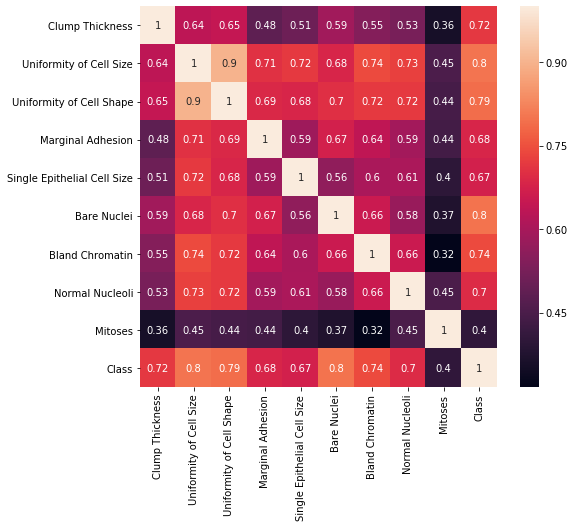

In [137]:
# Remove Zero Variance or Near Zero Variance Variables

df3=df3.loc[:, (df3 != df3.iloc[0]).any()] 
#df3_noncons=df3_nomiss.loc[:,df3_nomiss.apply(pd.Series.nunique) != 1] #remove cons vars
print (df3.shape) # No Constant variable found to drop


# Check for Correlations

#Correlation matrix (heatmap style)

corr1 = df3[df3.columns.values].corr()
f, ax = plt.subplots(figsize=(8,7))
sns.heatmap(corr1, annot=True)

# Data Visualization

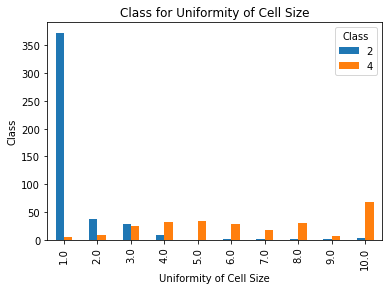

In [143]:
# 'Clump Thickness'
%matplotlib inline
pd.crosstab(df3['Clump Thickness'],df3.Class).plot(kind='bar')
plt.title('Class for Clump Thickness')
plt.xlabel('Clump Thickness')
plt.ylabel('Class')
plt.savefig('Clump Thickness_Class')

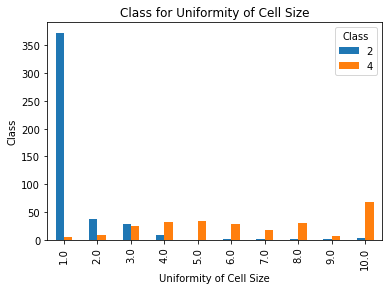

In [144]:
# 'Uniformity of Cell Size'
%matplotlib inline
pd.crosstab(df3['Uniformity of Cell Size'],df3.Class).plot(kind='bar')
plt.title('Class for Uniformity of Cell Size')
plt.xlabel('Uniformity of Cell Size')
plt.ylabel('Class')
plt.savefig('Uniformity of Cell Size_Class')

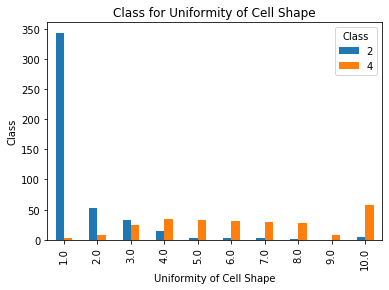

In [145]:
# 'Uniformity of Cell Shape'
%matplotlib inline
pd.crosstab(df3['Uniformity of Cell Shape'],df3.Class).plot(kind='bar')
plt.title('Class for Uniformity of Cell Shape')
plt.xlabel('Uniformity of Cell Shape')
plt.ylabel('Class')
plt.savefig('Uniformity of Cell Shape_Class')

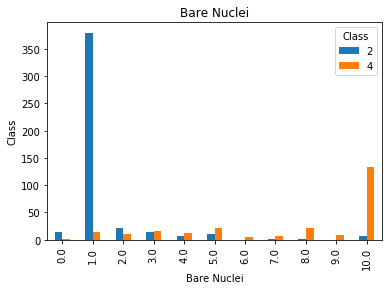

In [146]:
# 'Bare Nuclei'
%matplotlib inline
pd.crosstab(df3['Bare Nuclei'],df3.Class).plot(kind='bar')
plt.title('Bare Nuclei')
plt.xlabel('Bare Nuclei')
plt.ylabel('Class')
plt.savefig('Bare Nuclei_Class')

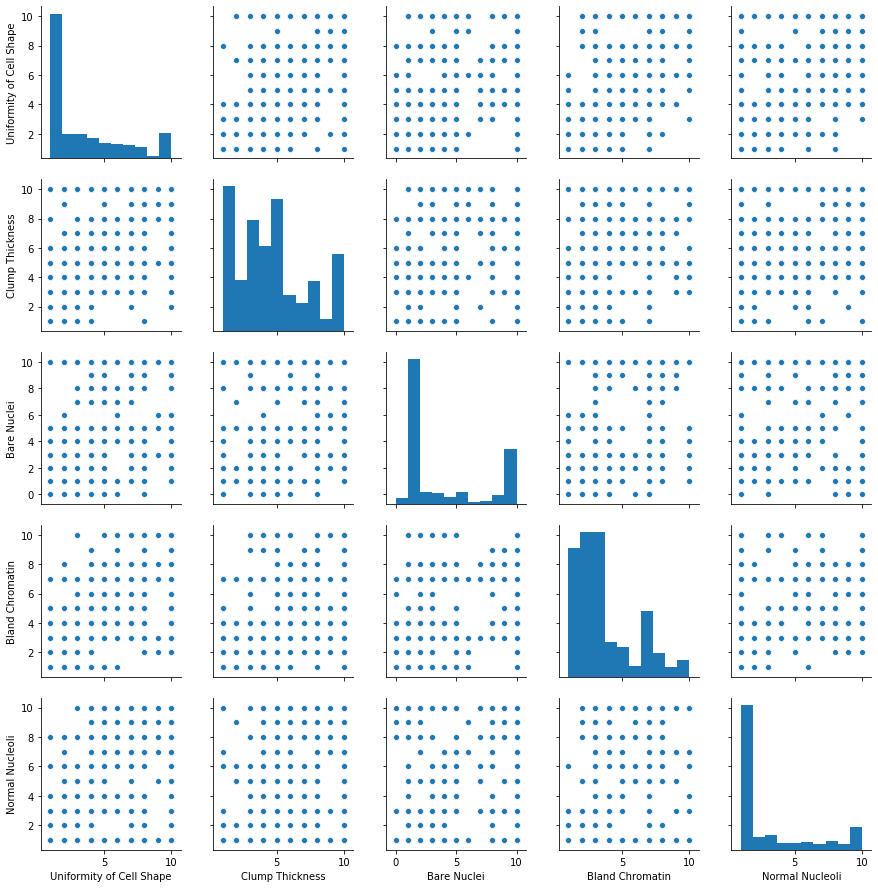

In [214]:
%config InlineBackend.figure_format = 'png'
# Let's plot out just the first 5 variables (features)
sns.pairplot(df3, vars = ['Uniformity of Cell Shape', 'Clump Thickness','Bare Nuclei','Bland Chromatin','Normal Nucleoli'] )
#ax = sns.pairplot(df3[['Class','Uniformity of Cell Shape', 'Clump Thickness','Bare Nuclei','Bland Chromatin','Normal Nucleoli']])

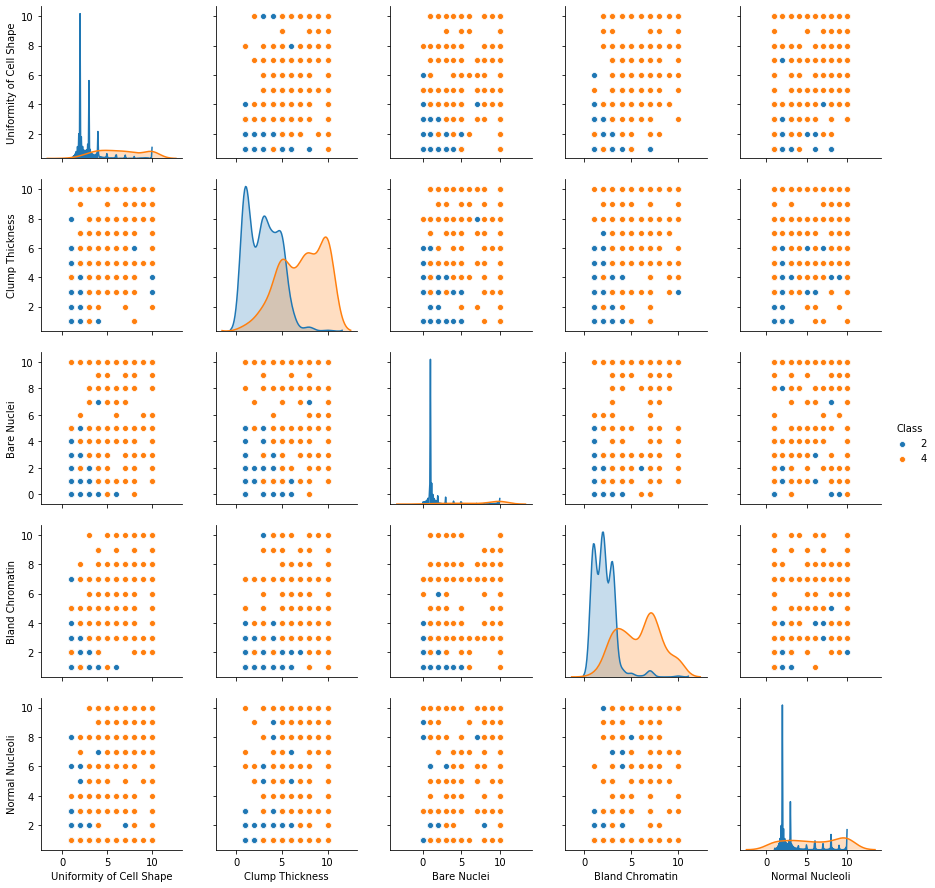

In [215]:
# Let's plot the relationship between our features with corresponding benign and malignant 

#4.0 (Orange) = Malignant (Cancer)
#2.0 (Blue) = Benign (No Cancer)
sns.pairplot(df3, hue = 'Class', vars = ['Uniformity of Cell Shape', 'Clump Thickness','Bare Nuclei','Bland Chromatin','Normal Nucleoli'] )

In [210]:
df3['Class']=df3['Class'].astype('category')
df3.shape

(710, 10)

# Over-sampling using SMOTE
 I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

In [282]:
X = df3.loc[:, df3.columns != 'Class']
y = df3.loc[:, df3.columns == 'Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Class'])
# # we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Class']==2]))
print("Number of subscription",len(os_data_y[os_data_y['Class']==4]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Class']==2])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Class']==4])/len(os_data_X))

length of oversampled data is  698
Number of no subscription in oversampled data 349
Number of subscription 349
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


# Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features. According to RFE all variables here are important and picked by the model.

In [250]:
data_final_vars=df3.columns.values.tolist()
print (data_final_vars)
y=['Class']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]


# Implementing the Model-Logistic Regression

Logistic Regression Assumptions:
Binary logistic regression requires the dependent variable to be binary.
For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
Only the meaningful variables should be included.
The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
The independent variables are linearly related to the log odds.
Logistic regression requires quite large sample sizes.


In [251]:
# statsmodel Logit
y_tr=y_train.copy()
y_tr['Class']=y_train['Class'].replace([2, 4],[0, 1])
logit_model=sm.Logit(y_tr,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.423321
         Iterations 7
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.342     
Dependent Variable:     Class               AIC:                 468.4135  
Date:                   2019-07-03 14:37    BIC:                 506.9033  
No. Observations:       532                 Log-Likelihood:      -225.21   
Df Model:               8                   LL-Null:             -342.42   
Df Residuals:           523                 LLR p-value:         3.4324e-46
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         7.0000                                             
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Clump Thickness  

In [252]:
X=X_train.drop('Uniformity of Cell Shape',1)
X=X_train.drop('Marginal Adhesion',1)
os_data_y['Class']=os_data_y['Class'].replace(2,0)
os_data_y['Class']=os_data_y['Class'].replace(4,1)
y=os_data_y['Class']
logit_model=sm.Logit(y_tr,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.423321
         Iterations 7
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.342     
Dependent Variable:     Class               AIC:                 466.4135  
Date:                   2019-07-03 14:37    BIC:                 500.6267  
No. Observations:       532                 Log-Likelihood:      -225.21   
Df Model:               7                   LL-Null:             -342.42   
Df Residuals:           524                 LLR p-value:         5.6993e-47
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         7.0000                                             
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Clump Thickness  

              precision    recall  f1-score   support

           2       0.97      0.95      0.96       107
           4       0.93      0.96      0.94        71

    accuracy                           0.96       178
   macro avg       0.95      0.96      0.95       178
weighted avg       0.96      0.96      0.96       178



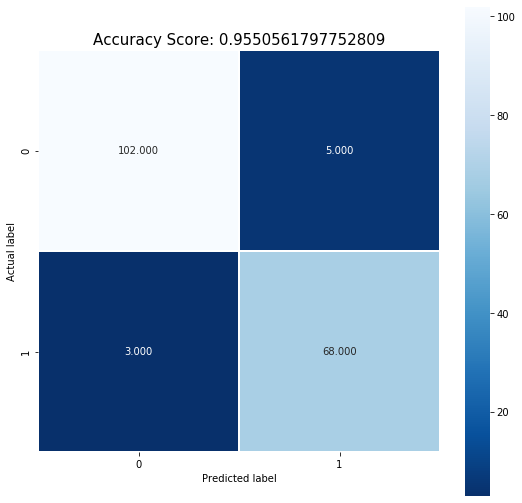

In [274]:
#scikit-learn logit

logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)

# Use score method to get accuracy of model
score = logreg.score(X_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
print(classification_report(y_test,predictions))

# Fixing Colinearity and Implement LR Model

              precision    recall  f1-score   support

           2       0.98      0.95      0.97       107
           4       0.93      0.97      0.95        71

    accuracy                           0.96       178
   macro avg       0.96      0.96      0.96       178
weighted avg       0.96      0.96      0.96       178



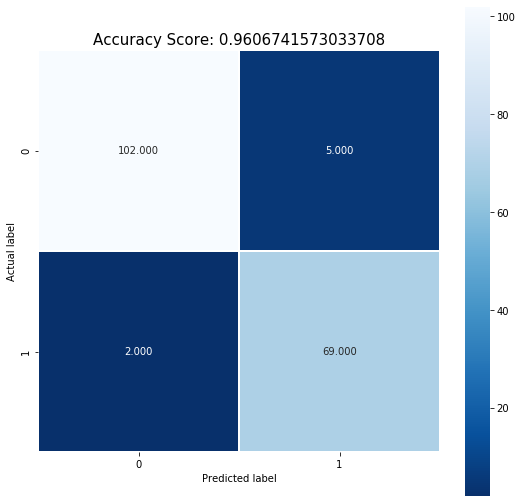

In [272]:
X_tr2=X_train.copy()
X_te2=X_test.copy()
y_tr2=y_train.copy()
y_te2=y_test.copy()
X_tr2=X_tr2.drop('Uniformity of Cell Size',1)
X_te2=X_te2.drop('Uniformity of Cell Size',1)

logreg2=logreg.fit(X_tr2, y_tr2)
predictions2 = logreg2.predict(X_te2)
cm = metrics.confusion_matrix(y_te2, predictions2)

# Use score method to get accuracy of model
score2 = logreg.score(X_te2, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score2)
plt.title(all_sample_title, size = 15);
print(classification_report(y_te2,predictions2))

# ROC Curve

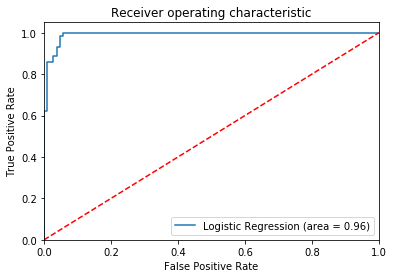

In [275]:
y_te=y_test.copy()
y_te['Class']=y_te['Class'].replace([2, 4],[0, 1])
logit_roc_auc = roc_auc_score(y_te, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_te, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Model with considering Oversampled sinthetic training data

0.9550561797752809
              precision    recall  f1-score   support

           2       0.97      0.95      0.96       107
           4       0.93      0.96      0.94        71

    accuracy                           0.96       178
   macro avg       0.95      0.96      0.95       178
weighted avg       0.96      0.96      0.96       178



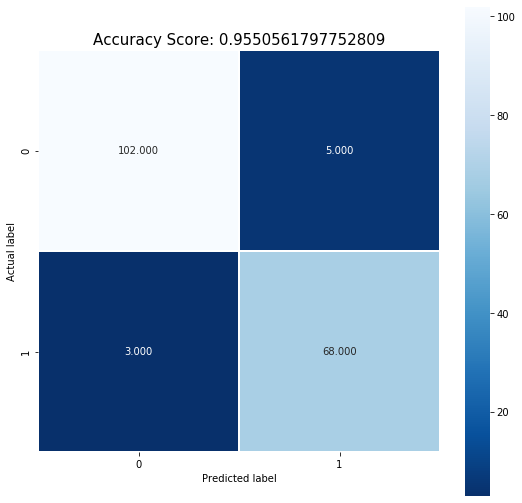

In [283]:
#scikit-learn logit

logreg.fit(os_data_X, os_data_y)
predictions = logreg.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)

# Use score method to get accuracy of model
score = logreg.score(X_test, y_test)
print (score)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
print(classification_report(y_test,predictions))

# Random Forest Model Implemented 
The recall of the model here is really important, we do not want to predict any patient with malignant cancer as benign, so as part of this I implemented Non-linear model RF.

              precision    recall  f1-score   support

           2       0.98      0.95      0.97       107
           4       0.93      0.97      0.95        71

    accuracy                           0.96       178
   macro avg       0.96      0.96      0.96       178
weighted avg       0.96      0.96      0.96       178



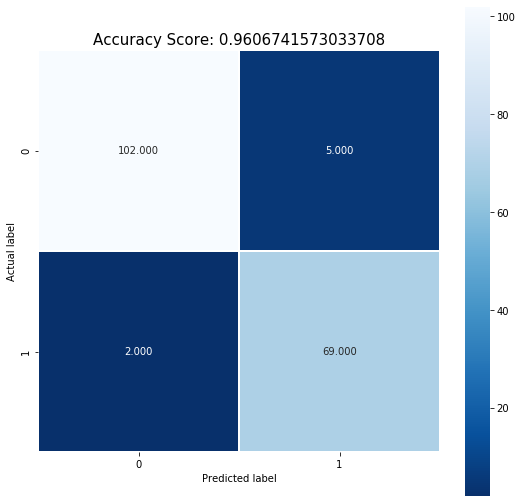

In [284]:
# Create the model with 100 trees
RF = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
RF.fit(X_train, y_train)

# Actual class predictions
rf_predictions = RF.predict(X_test)
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

cm = metrics.confusion_matrix(y_test, rf_predictions)
# Use score method to get accuracy of model
rf_score = RF.score(X_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rf_score)
plt.title(all_sample_title, size = 15);
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

           2       0.98      0.95      0.97       107
           4       0.93      0.97      0.95        71

    accuracy                           0.96       178
   macro avg       0.96      0.96      0.96       178
weighted avg       0.96      0.96      0.96       178



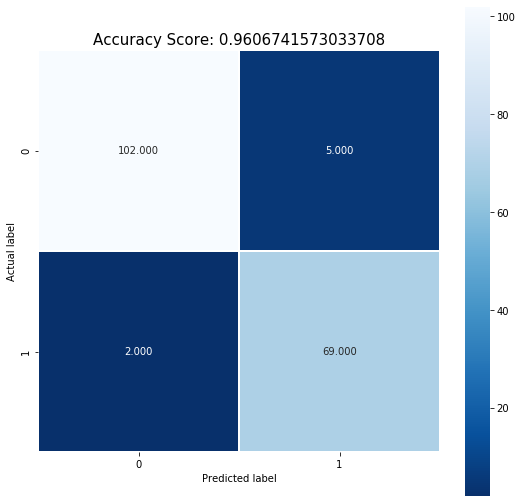

In [285]:
# Create the model with 100 trees with oversampled Data
RF = RandomForestClassifier(n_estimators=150, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
RF.fit(os_data_X, os_data_y)

# Actual class predictions
rf_predictions = RF.predict(X_test)
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

cm = metrics.confusion_matrix(y_test, rf_predictions)
# Use score method to get accuracy of model
rf_score = RF.score(X_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rf_score)
plt.title(all_sample_title, size = 15);
print(classification_report(y_test,rf_predictions))

# What features of a cell are the largest drivers of malignancy?

In [286]:
# Extract feature importances
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi.head(9)

,feature,importance
2,Uniformity of Cell Shape,0.247774
1,Uniformity of Cell Size,0.224273
5,Bare Nuclei,0.176560
4,Single Epithelial Cell Size,0.104079
6,Bland Chromatin,0.081790
7,Normal Nucleoli,0.079964
0,Clump Thickness,0.051846
3,Marginal Adhesion,0.019799
8,Mitoses,0.013916


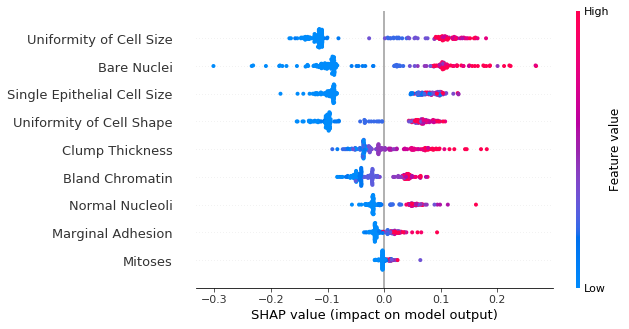

In [287]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(RF )

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)

# Summary and How the product can be used by Physician